# Baryonic halo model 

In this example, we illustrate how to build a baryonic halo model in CCL.
 We follow mostly the equations in Fedeli (2014), arXiv:1401.2997,
  with some small modifications.

In [1]:
from classes.baryon_halo_model import BaryonHaloModel
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent, LogLocator
import numpy as np
import pyccl as ccl


## Preliminaries

Here we define some parameters that are needed for the model.

In [2]:
cosmology = ccl.CosmologyVanillaLCDM()  # cosmology object
k_array = np.logspace(-3, 2, 25)  # wavenumber
scale_factor = 1.  # scale factor at z = 0
halo_mass_definition = ccl.halos.MassDef(200, 'matter')  # halo mass definition
# Now we initialize the BaryonHaloModel object
bhm = BaryonHaloModel(cosmology, k_array, scale_factor, halo_mass_definition)


All profiles (dark_matter, gas, stars) have been interpolated and stored.


In [3]:
# Define a dictionary with all the plotting parameters
plotting_params = {
    'lines.linewidth': 3.5,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 17,
    'legend.fontsize': 15,
    'legend.frameon': True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,
    'figure.autolayout': True 
}

# Update matplotlib's rcParams
plt.rcParams.update(plotting_params)

# Define some colors for the plots
n_spectra = 9  # number of all spectra
pk_colors_list = bhm.get_colors(n_colors=n_spectra, cmap='cmr.pride', cmap_range=(0.1, 0.9))

# Now assign eahc component a color in a dictionary
pk_colors = {
    "dark_matter": pk_colors_list[0],
    "gas": pk_colors_list[1],
    "stars": pk_colors_list[2],
    "dark_matter_gas": pk_colors_list[3],
    "dark_matter_stars": pk_colors_list[4],
    "stars_gas": pk_colors_list[5],
    "auto": pk_colors_list[6],
    "cross": pk_colors_list[7],
    "total": pk_colors_list[8]
}

# We also define some line styles for the plots
# Define custom line styles
loosely_dotted = (0, (1, 7))  # A pattern of 1 unit of line followed by 7 units of space
loosely_dashed = (0, (7, 5))  # A pattern of 7 units of line followed by 5 units of space
# A pattern of 3 units of line, 1 unit of space, 1 unit of line, 1 unit of space, and repeat
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1, 1, 1))  
densely_dashed = (0, (7, 1))

alpha=0.5


In [4]:
def set_log_scale_and_format(ax):
    """
    Set log scale and tick formatting for a given axes object.
    Args:
    ax (matplotlib.axes.Axes): The axes object to modify.
    """
    # Set log scale explicitly within the function
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Define locators and formatters
    x_locator = LogLocator(base=10, subs=[1.0], numticks=10)  # using only the base for major ticks
    y_locator = LogLocator(base=10, subs=[1.0], numticks=5)
    x_formatter = LogFormatterExponent(base=10)
    y_formatter = LogFormatterExponent(base=10)

    # Set major locators and formatters for both axes using the ax parameter directly
    ax.xaxis.set_major_locator(x_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    ax.yaxis.set_major_locator(y_locator)
    ax.yaxis.set_major_formatter(y_formatter)

    # Explicitly draw ticks (sometimes necessary in certain environments)
    ax.figure.canvas.draw()


# Mass fractions


Baryon Halo Model (BHM) provides a method to calculate the mass fractions of the different components in the model.

We first proceed to calculate the mass fractions of the different components in the model.
We will plot them as a function of mass.

### Calculate the mass fractions
We can easily calculate the mass fractions of the different components
by calling the mass_fraction_dict method. 

It will return a dictionary with
the mass fractions of the different components (dark matter, gas, stars).

Since we initialized the BaryonHaloModel object with a cosmology object and other parameters,
we can directly call the method without passing any arguments.

In [5]:
mass_array = np.geomspace(1E6, 1E16, 128)  
mass_frac_dict = bhm.mass_fraction_dict(mass_array)
colors_mass_frac = bhm.get_colors(n_colors=len(mass_frac_dict.keys()), cmap='cmr.pride', cmap_range=(0.3, 0.9))

### Plot the mass fractions

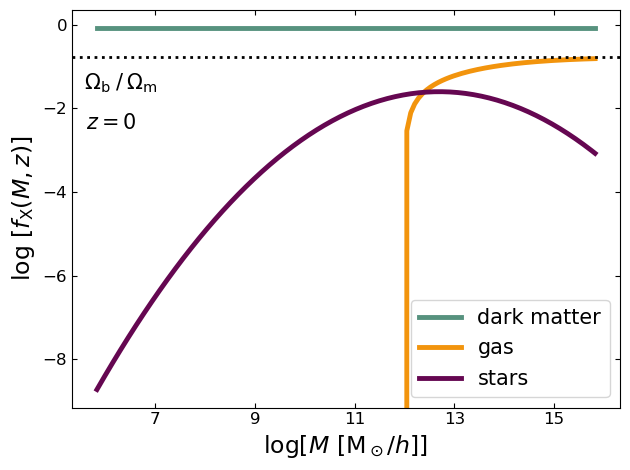

In [6]:
labels = ["dark matter", "gas", "stars"]  # labels for the plot (notice the order! check keys in mass_frac_dict)

# Plot the mass fractions from the dictionary
for i, key in enumerate(mass_frac_dict.keys()):
    plt.plot(mass_array * cosmology['h'], mass_frac_dict[key], c=colors_mass_frac[i], label=labels[i])
    
plt.xscale('log')
plt.yscale('log')
    
# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())

# Here we add some extra useful info to the plot
omega_ratio = cosmology['Omega_b']/cosmology['Omega_m']  # baryon to matter ratio
plt.axhline(omega_ratio, c="k", ls=":", lw=2)  
plt.text(0.01, 0.8, r" $\Omega_\mathrm{b} \: / \: \Omega_\mathrm{m}$", fontsize=15, transform=plt.gca().transAxes)
plt.text(0.025, 0.7, r"$z = 0$", fontsize=15, transform=plt.gca().transAxes)

plt.xlabel(r'log$[M$ $[$M$_\odot/h]]$')
plt.ylabel(r'log $[f_{\rm X}(M, z)]$')
plt.legend(loc="best")

# Finally, we save the plot
plt.savefig("plots_output/bhm_mass_fractions.png", dpi=300)
plt.savefig("plots_output/bhm_mass_fractions.pdf", dpi=300)

# Density Profiles

The next step is to calculate the density profiles of the different components in the model.
We will plot them as a function of wavenumber.


### Calculate the density profiles

In the same manner as before, we can calculate the density profiles of the different components in the model.

Since the class is initialized with the cosmology object and other parameters, we can directly call the method
without passing any arguments. It will return a dictionary with the density profiles of the different components.

In [7]:
%%time  
# This will run quite fast (about 7 seconds for all components)
profiles_dict = bhm.profiles_dict()

All profiles (dark_matter, gas, stars) have been interpolated and stored.
CPU times: user 24.2 s, sys: 2.4 s, total: 26.6 s
Wall time: 4.12 s


### Plot the density profiles

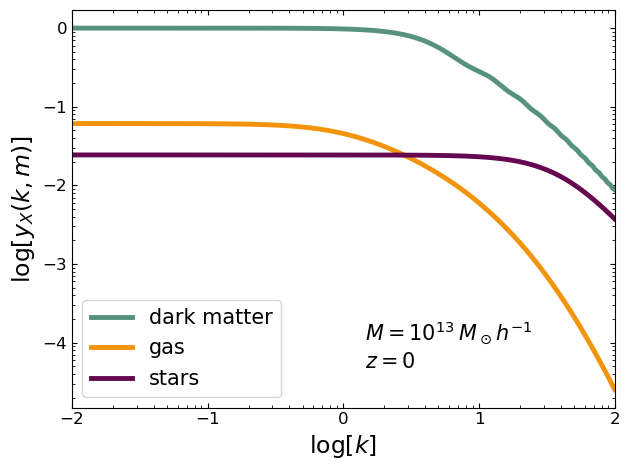

In [8]:
# Defin some reasonable values for the wavenumber and the mass of the halo
k_interp_vec = np.logspace(-4, 2, 1500)  # wavenumber for interpolation
mass = 1e13 / cosmology['h']  # mass of the halo, representative value
labels = ["dark matter", "gas", "stars"]  # labels for the plot (notice the order! check keys in profiles_dict)

# Plot the profiles
for i, key in enumerate(profiles_dict.keys()):
    plt.loglog(k_interp_vec, profiles_dict[key]((mass, k_interp_vec)), c=colors_mass_frac[i], label=labels[i])
    
plt.text(0.54, 0.17, r"$M = 10^{13} \: M_\odot h^{-1}$", fontsize=15, transform=plt.gca().transAxes)
plt.text(0.54, 0.1, r"$z = 0$", fontsize=15, transform=plt.gca().transAxes)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())

plt.xlim(xmin=1e-2, xmax=1e2)
plt.xlabel('log$[k]$')
plt.ylabel('log$[y_X(k, m)]$')
plt.legend()

# Now we save the plot
plt.savefig("plots_output/bhm_density_profiles.png", dpi=300)
plt.savefig("plots_output/bhm_density_profiles.pdf", dpi=300)

# Matter Power Spectra

We now calculate the power spectra of the desired component or a total power spectrum. <br>

Each component is a combination of several terms.
We will plot them as a function of wavenumber. <br>

Note that the calculation of the power spectra will take a while.
I have already calculated them and saved them in a numpy file.
So we will load them and plot them.
However, I will leave the code here for reference on how you can calculate them. <br>

The way you can calculate the power spectra is by calling the `power_spectra_dict` method
 and specifying the array of wavenumbers and the component you want to calculate the power spectrum for.
To showcase: `pk_dm = bhm.power_spectra_dict(k_array, "dark_matter")`
The available keys are: "dark_matter", "gas", "stars",
"dark_matter_gas", "dark_matter_stars", "stars_gas",
"auto", "cross", "total". <br>

Additionally, you can calculate the individual terms that make up the power spectra
by calling the `individual_terms_dict` method and specifying the array of wavenumbers
and the component you want to calculate the individual terms for.
To showcase: `dm_terms = bhm.individual_terms_dict(k_array, "dark_matter")`
The available keys are: "dark_matter", "gas", "stars", "dark_matter_gas",
"dark_matter_stars", "stars_gas".
Note that the terms you obtain will be tuples.


Lastly, I will provide the approximate execution times for calculating the power spectra
for the different components.
On my MacBook Pro 2019, the times are approximately:
<br>

| $P_k$  Component    | Wall Time      |
|---------------------|----------------|
| Dark matter auto    | cca 15 min     |
| Stars auto          | cca 7 min      |
| Gas auto            | cca 10 min     |
| Dark matter x Gas   | cca 18 min     |
| Dark matter x Stars | cca 16 min     |
| Stars x Gas         | cca 8 min      |
| Auto total          | cca 43 min     |
| Cross total         | cca 50  min    |
| Total               | cca 1 h 18 min |


For the individual terms, execution times will be essentially
like the ones in the above table.
Note that the "auto, "cross", an "total" terms are not available for the individual terms
(because they consist of the spectra themselves). <br>



### Calculate the power spectra

In [9]:
%%time
# Takes about 16 min to evaluate the auto Pk for dark matter.
# Uncomment the lines below to calculate the power spectra
# for the desired component.
# component = "dark_matter
# pk_dm = bhm.power_spectra_dict(k_array, component)

# If you wish to get the total power spectrum, you can do it like this:
# pk_total = bhm.power_spectra_dict(k_array, "total")

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [10]:
# Since I already calculated the power spectra, I will load them.
bhm_pk_dict = np.load("data/baryons_halo_model_pk.npy", allow_pickle=True).item()

# I will also load the terms that make up the power spectra.
terms_dict = np.load("data/baryons_halo_model_terms.npy", allow_pickle=True).item()

# You can check the available keys in the dictionaries
bhm_pk_dict.keys(), terms_dict.keys()

# Let us also define the non-linear matter power spectrum for comparison
pk_nonlin = ccl.nonlin_matter_power(cosmology, k_array, scale_factor)

## Dark Matter Power Spectrum

Let us start with the dark matter power spectrum.
The dark matter component is straigthforward, and it is comprised of the one-halo and two-halo terms.

Let us plot the halo terms and the total auto power spectrum.

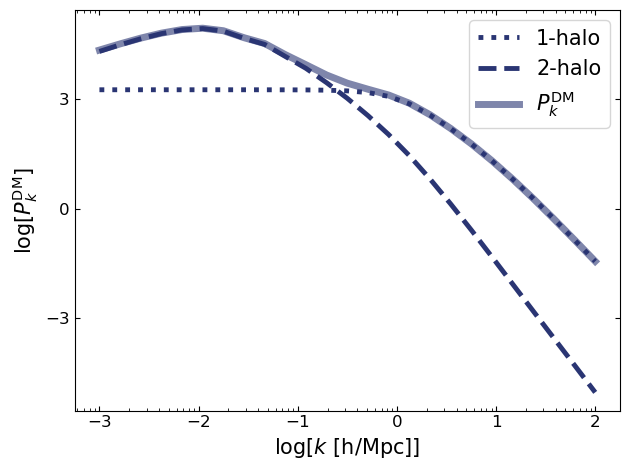

In [11]:
# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["dark_matter_one_halo"],
           c=pk_colors["dark_matter"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["dark_matter_two_halo"],
           c=pk_colors["dark_matter"],
           label="2-halo",
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter"],
           c=pk_colors["dark_matter"],
           label="$P_k^{\mathrm{DM}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{DM}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_dark_matter_pk.png", dpi=300)
plt.savefig("plots_output/bhm_dark_matter_pk.pdf", dpi=300)

### Comparison with the non-linear power spectrum

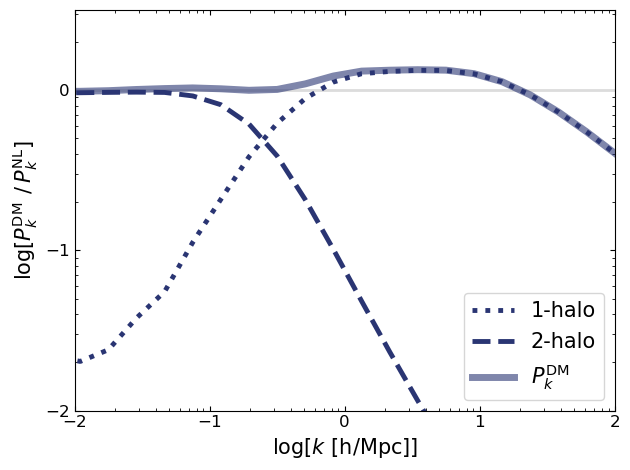

In [12]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["dark_matter_one_halo"]/pk_nonlin,
           c=pk_colors["dark_matter"], 
           label="1-halo",
           ls=":")
plt.loglog(terms_dict["k_array"],
           terms_dict["dark_matter_two_halo"]/pk_nonlin,
           c=pk_colors["dark_matter"],
           label="2-halo",
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter"]/pk_nonlin,
           c=pk_colors["dark_matter"],
           label="$P_k^{\mathrm{DM}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{DM}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())

plt.xlim(1E-2, 1E2)
plt.ylim(1E-2, 10**0.5)
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_dark_matter_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_dark_matter_pk_ratio.pdf", dpi=300)

## Gas Power Spectrum

Next, we move to the gas power spectrum.

Gas is a bit more complicated, and it is comprised of the one-halo, two-halo, diffuse term, and diffuse halo term.
In other owrds, we are correlating particles:
- within the same halo (1-halo term),
- particles in different halos (2-halo term), 
- particle residing in the diffuse gas (diffuse term),
- particles in the diffuse gas and halos (diffuse halo term).

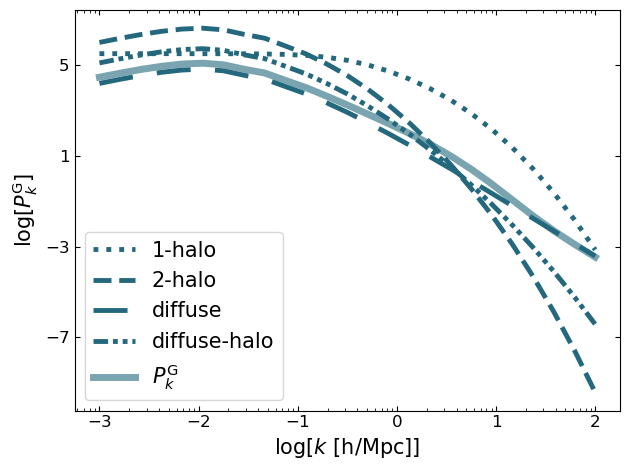

In [13]:
# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["gas_one_halo"],
           c=pk_colors["gas"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["gas_two_halo"],
           c=pk_colors["gas"],
           label="2-halo",
           ls="--")
plt.loglog(terms_dict["k_array"],
           terms_dict["gas_diffuse_term"],
           c=pk_colors["gas"],
           label="diffuse",
           ls=loosely_dashed)
plt.loglog(terms_dict["k_array"],
           terms_dict["gas_diffuse_halo_term"],
           c=pk_colors["gas"],
           label="diffuse-halo",
           ls=densely_dashdotdotted)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["gas"],
           c=pk_colors["gas"],
           label="$P_k^{\mathrm{G}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{G}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_gas_pk.png", dpi=300)
plt.savefig("plots_output/bhm_gas_pk.pdf", dpi=300)

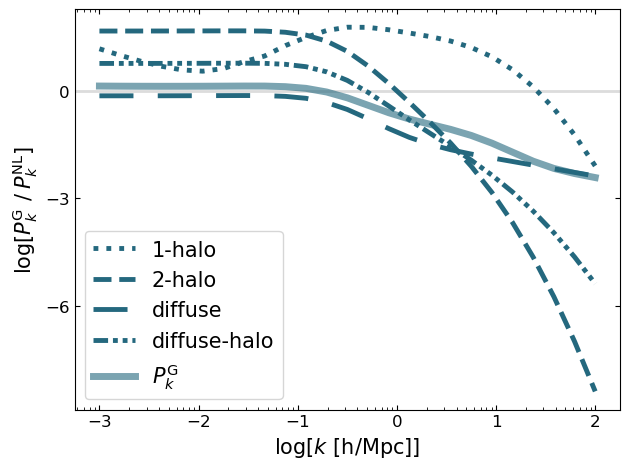

In [14]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["gas_one_halo"]/pk_nonlin,
           c=pk_colors["gas"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["gas_two_halo"]/pk_nonlin,
           c=pk_colors["gas"],
           label="2-halo",
           ls="--")
plt.loglog(terms_dict["k_array"],
           terms_dict["gas_diffuse_term"]/pk_nonlin,
           c=pk_colors["gas"],
           label="diffuse",
           ls=loosely_dashed)
plt.loglog(terms_dict["k_array"],
           terms_dict["gas_diffuse_halo_term"]/pk_nonlin,
           c=pk_colors["gas"],
           label="diffuse-halo",
           ls=densely_dashdotdotted)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["gas"]/pk_nonlin,
           c=pk_colors["gas"],
           label="$P_k^{\mathrm{G}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{G}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_gas_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_gas_pk_ratio.pdf", dpi=300)

## Stars Power Spectrum

Next, we move to the stars power spectrum.

The stellar auto spectra is pretty straightforward, and it is comprised of the one-halo and two-halo terms.

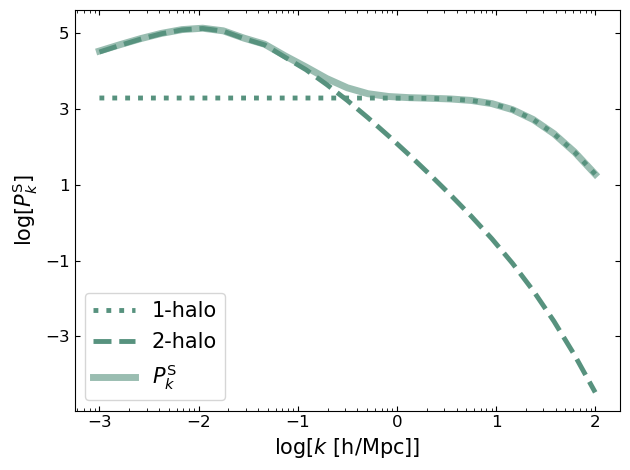

In [15]:
# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["stars_one_halo"],
           c=pk_colors["stars"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["stars_two_halo"],
           c=pk_colors["stars"],
           label="2-halo",
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["stars"],
           c=pk_colors["stars"],
           label="$P_k^{\mathrm{S}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{S}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_stars_pk.png", dpi=300)
plt.savefig("plots_output/bhm_stars_pk.pdf", dpi=300)

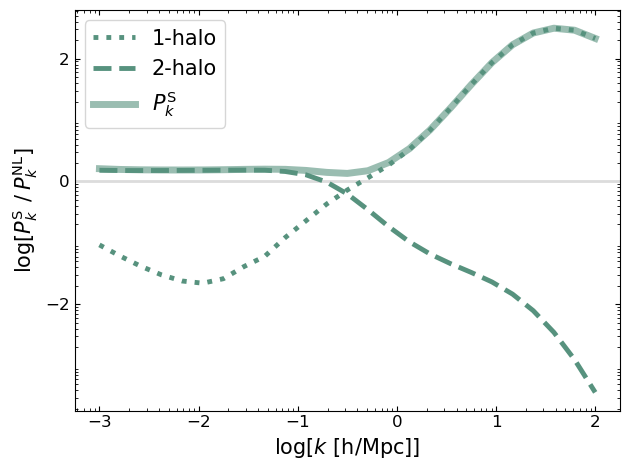

In [16]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["stars_one_halo"]/pk_nonlin,
           c=pk_colors["stars"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["stars_two_halo"]/pk_nonlin,
           c=pk_colors["stars"],
           label="2-halo",
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["stars"]/pk_nonlin,
           c=pk_colors["stars"],
           label="$P_k^{\mathrm{S}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{S}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_stars_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_stars_pk_ratio.pdf", dpi=300)

## Dark Matter x Gas Power Spectrum

After showcasing the auto power spectra, we move to the cross power spectra.
First one is the dark matter x gas cross power spectrum.

Dark matter x gas is comprised of the one-halo, two-halo, and diffuse term.

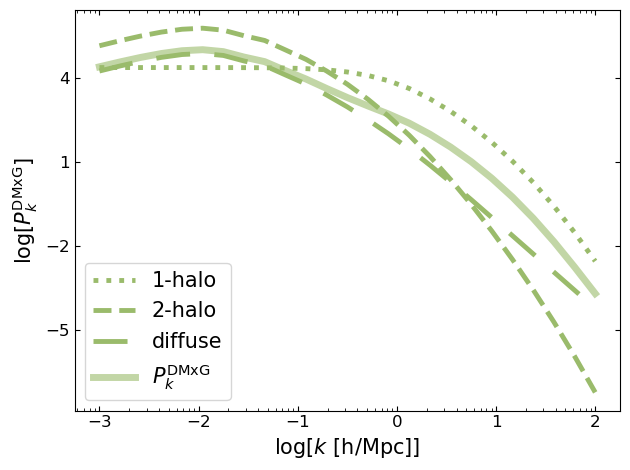

In [17]:
# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["dm_gas_one_halo"],
           c=pk_colors["dark_matter_gas"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["dm_gas_two_halo"],
           c=pk_colors["dark_matter_gas"],
           label="2-halo",
           ls="--")
plt.loglog(terms_dict["k_array"],
           terms_dict["dm_gas_diffuse_term"],
           c=pk_colors["dark_matter_gas"],
           label="diffuse",
           ls=loosely_dashed)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_gas"],
           c=pk_colors["dark_matter_gas"],
           label="$P_k^{\mathrm{DMxG}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{DMxG}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_dark_matter_gas_pk.png", dpi=300)
plt.savefig("plots_output/bhm_dark_matter_gas_pk.pdf", dpi=300)

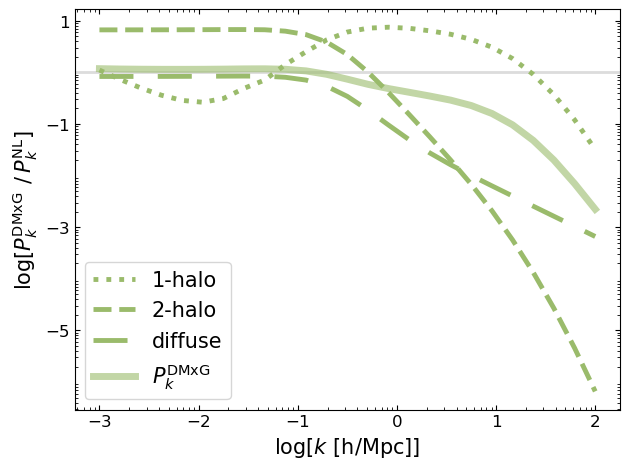

In [18]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["dm_gas_one_halo"]/pk_nonlin,
           c=pk_colors["dark_matter_gas"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["dm_gas_two_halo"]/pk_nonlin,
           c=pk_colors["dark_matter_gas"],
           label="2-halo",
           ls="--")
plt.loglog(terms_dict["k_array"],
           terms_dict["dm_gas_diffuse_term"]/pk_nonlin,
           c=pk_colors["dark_matter_gas"],
           label="diffuse",
           ls=loosely_dashed)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_gas"]/pk_nonlin,
           c=pk_colors["dark_matter_gas"],
           label="$P_k^{\mathrm{DMxG}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{DMxG}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_dark_matter_gas_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_dark_matter_gas_pk_ratio.pdf", dpi=300)

## Dark Matter x Stars Power Spectrum

Next, we move to the dark matter x stars cross power spectrum.
This cross power spectrum is simple and comprised of the one-halo and two-halo terms.

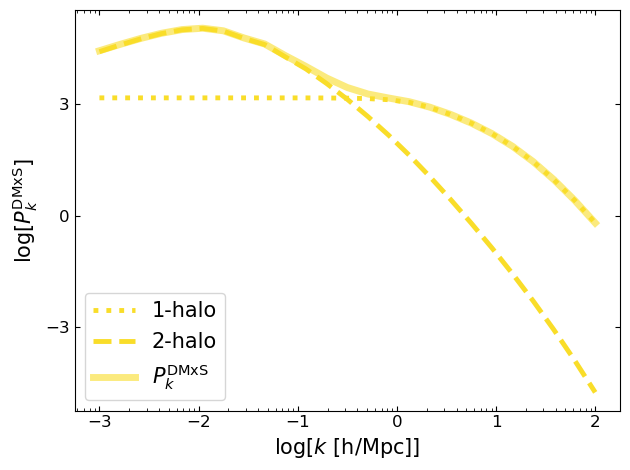

In [19]:
# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["dm_stars_one_halo"],
           c=pk_colors["dark_matter_stars"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["dm_stars_two_halo"],
           c=pk_colors["dark_matter_stars"],
           label="2-halo",
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_stars"],
           c=pk_colors["dark_matter_stars"],
           label="$P_k^{\mathrm{DMxS}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{DMxS}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_dark_matter_stars_pk.png", dpi=300)
plt.savefig("plots_output/bhm_dark_matter_stars_pk.pdf", dpi=300)

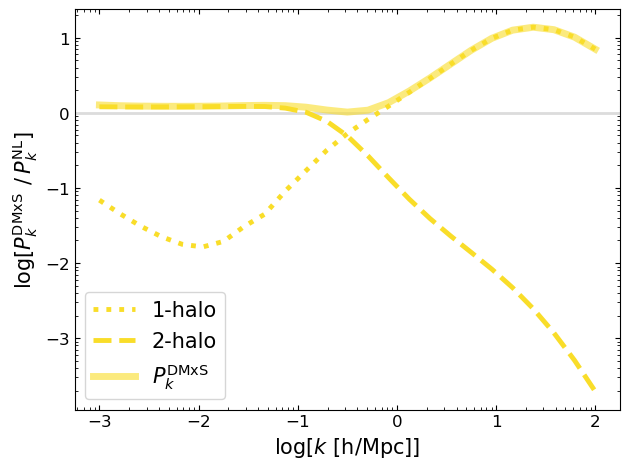

In [20]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["dm_stars_one_halo"]/pk_nonlin,
           c=pk_colors["dark_matter_stars"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["dm_stars_two_halo"]/pk_nonlin,
           c=pk_colors["dark_matter_stars"],
           label="2-halo",
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_stars"]/pk_nonlin,
           c=pk_colors["dark_matter_stars"],
           label="$P_k^{\mathrm{DMxS}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{DMxS}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_dark_matter_stars_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_dark_matter_stars_pk_ratio.pdf", dpi=300)

## Stars x Gas Power Spectrum

The last cross power spectrum we will plot is the stars x gas cross power spectrum.
This cross power spectrum is simple and comprised of the one-halo, two-halo terms, and the diffuse term.

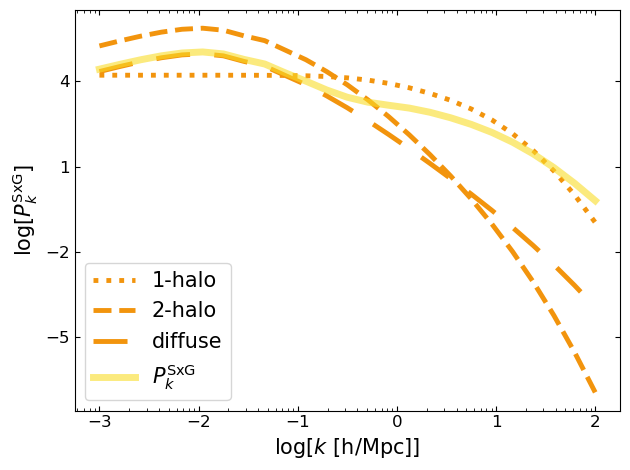

In [21]:
# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["stars_gas_one_halo"],
           c=pk_colors["stars_gas"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["stars_gas_two_halo"],
           c=pk_colors["stars_gas"],
           label="2-halo",
           ls="--")
plt.loglog(terms_dict["k_array"],
              terms_dict["stars_gas_diffuse_term"],
              c=pk_colors["stars_gas"],
              label="diffuse",
              ls=loosely_dashed)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_stars"],
           c=pk_colors["dark_matter_stars"],
           label="$P_k^{\mathrm{SxG}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{SxG}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_stars_gas_pk.png", dpi=300)
plt.savefig("plots_output/bhm_stars_gas_pk.pdf", dpi=300)

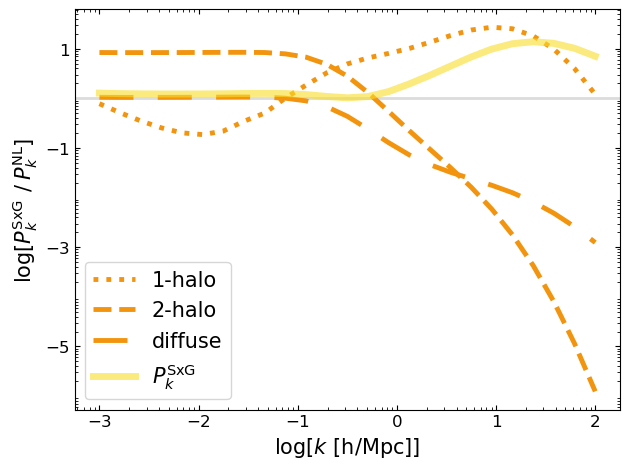

In [22]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(terms_dict["k_array"], 
           terms_dict["stars_gas_one_halo"]/pk_nonlin,
           c=pk_colors["stars_gas"], 
           label="1-halo",
           ls=":",)
plt.loglog(terms_dict["k_array"],
           terms_dict["stars_gas_two_halo"]/pk_nonlin,
           c=pk_colors["stars_gas"],
           label="2-halo",
           ls="--")
plt.loglog(terms_dict["k_array"],
              terms_dict["stars_gas_diffuse_term"]/pk_nonlin,
              c=pk_colors["stars_gas"],
              label="diffuse",
              ls=loosely_dashed)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_stars"]/pk_nonlin,
           c=pk_colors["dark_matter_stars"],
           label="$P_k^{\mathrm{SxG}}$",
           alpha=0.6,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{SxG}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_stars_gas_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_stars_gas_pk_ratio.pdf", dpi=300)

## Auto Power Spectrum


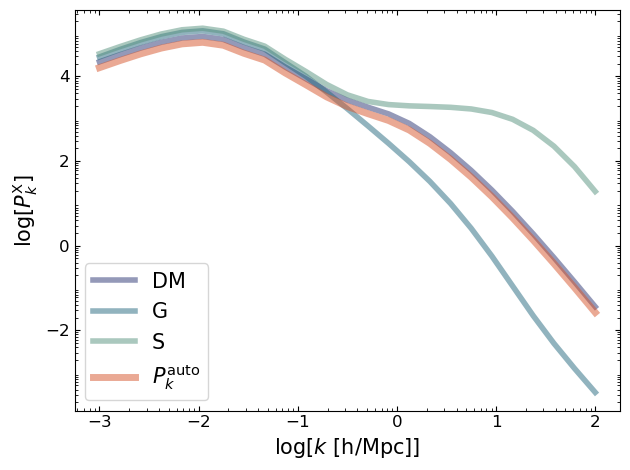

In [23]:
# Plot the individual terms
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter"],
           c=pk_colors["dark_matter"], 
           label="DM",
           alpha=alpha,
           lw=4)
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["gas"],
              c=pk_colors["gas"],
              label="G",
              alpha=alpha,
              lw=4)

plt.loglog(bhm_pk_dict["k_array"],
               bhm_pk_dict["stars"],
                c=pk_colors["stars"],
                label="S",
                alpha=alpha,
                lw=4)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["auto"],
           c=pk_colors["auto"],
           label="$P_k^{\mathrm{auto}}$",
           alpha=alpha,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_auto_pk.png", dpi=300)
plt.savefig("plots_output/bhm_auto_pk.pdf", dpi=300)

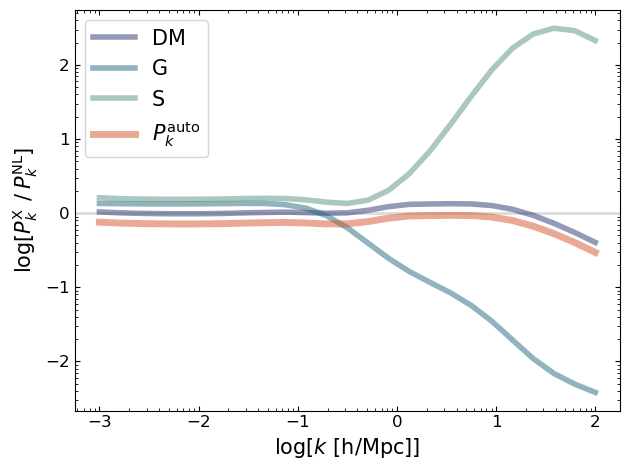

In [24]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter"]/pk_nonlin,
           c=pk_colors["dark_matter"], 
           label="DM",
           alpha=alpha,
           lw=4)
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["gas"]/pk_nonlin,
              c=pk_colors["gas"],
              label="G",
              alpha=alpha,
              lw=4)

plt.loglog(bhm_pk_dict["k_array"],
               bhm_pk_dict["stars"]/pk_nonlin,
                c=pk_colors["stars"],
                label="S",
                alpha=alpha,
                lw=4)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["auto"]/pk_nonlin,
           c=pk_colors["auto"],
           label="$P_k^{\mathrm{auto}}$",
           alpha=alpha,
           lw=5)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_auto_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_auto_pk_ratio.pdf", dpi=300)

## Cross Power Spectrum

We move to the cross power spectrum.

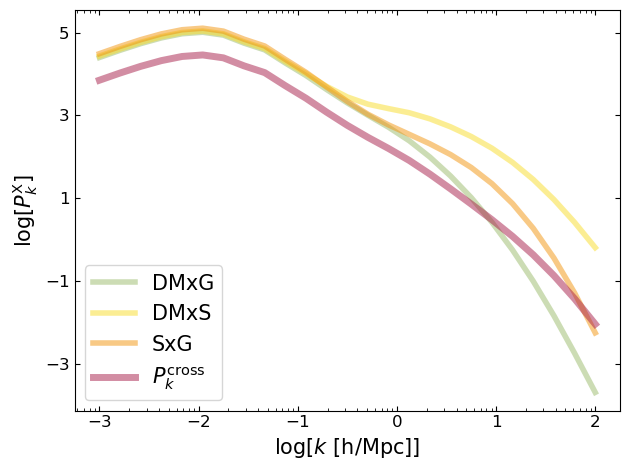

In [25]:
# Plot the individual terms
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_gas"],
           c=pk_colors["dark_matter_gas"], 
           label="DMxG",
           alpha=alpha,
           lw=4)
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["dark_matter_stars"],
              c=pk_colors["dark_matter_stars"],
              label="DMxS",
              alpha=alpha,
              lw=4)
plt.loglog(bhm_pk_dict["k_array"],
               bhm_pk_dict["stars_gas"],
                c=pk_colors["stars_gas"],
                label="SxG",
                alpha=alpha,
                lw=4)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["cross"],
           c=pk_colors["cross"],
           label="$P_k^{\mathrm{cross}}$",
           alpha=alpha,
           lw=5,)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_cross_pk.png", dpi=300)
plt.savefig("plots_output/bhm_cross_pk.pdf", dpi=300)

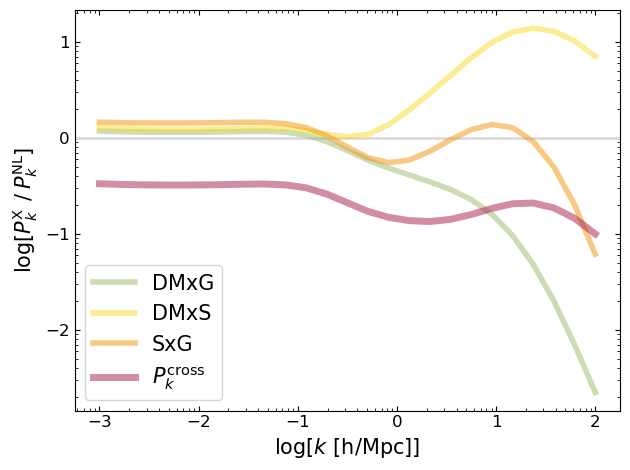

In [26]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["dark_matter_gas"]/pk_nonlin,
           c=pk_colors["dark_matter_gas"], 
           label="DMxG",
           alpha=alpha,
           lw=4)
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["dark_matter_stars"]/pk_nonlin,
              c=pk_colors["dark_matter_stars"],
              label="DMxS",
              alpha=alpha,
              lw=4)
plt.loglog(bhm_pk_dict["k_array"],
               bhm_pk_dict["stars_gas"]/pk_nonlin,
                c=pk_colors["stars_gas"],
                label="SxG",
                alpha=alpha,
                lw=4)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["cross"]/pk_nonlin,
           c=pk_colors["cross"],
           label="$P_k^{\mathrm{cross}}$",
           alpha=alpha,
           lw=5,)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_cross_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_cross_pk_ratio.pdf", dpi=300)

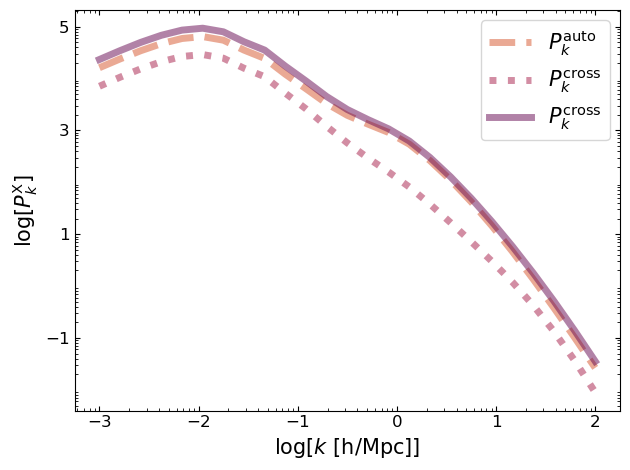

In [27]:
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["auto"],
           c=pk_colors["auto"],
           label="$P_k^{\mathrm{auto}}$",
           alpha=alpha,
           lw=5,
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["cross"],
           c=pk_colors["cross"],
           label="$P_k^{\mathrm{cross}}$",
           alpha=alpha,
           lw=5,
           ls=":")
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["total"],
           c=pk_colors["total"],
           label="$P_k^{\mathrm{cross}}$",
           alpha=alpha,
           lw=5, )

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_total_pk.png", dpi=300)
plt.savefig("plots_output/bhm_total_pk.pdf", dpi=300)

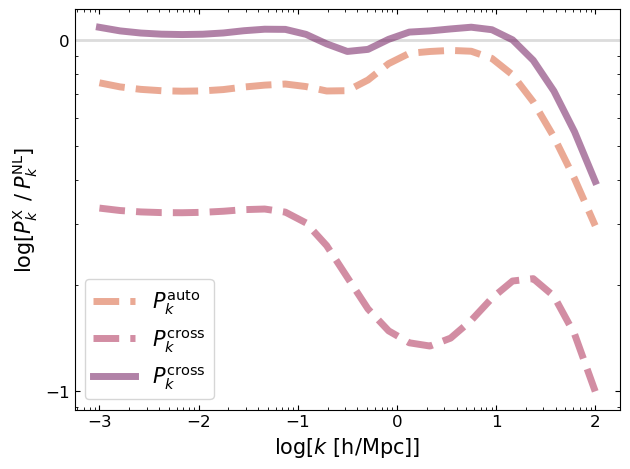

In [28]:
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["auto"]/pk_nonlin,
           c=pk_colors["auto"],
           label="$P_k^{\mathrm{auto}}$",
           alpha=alpha,
           lw=5,
           ls="--")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["cross"]/pk_nonlin,
           c=pk_colors["cross"],
           label="$P_k^{\mathrm{cross}}$",
           alpha=alpha,
           lw=5,
           ls="--")
plt.loglog(bhm_pk_dict["k_array"],
           bhm_pk_dict["total"]/pk_nonlin,
           c=pk_colors["total"],
           label="$P_k^{\mathrm{cross}}$",
           alpha=alpha,
           lw=5, )

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_total_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_total_pk_ratio.pdf", dpi=300)

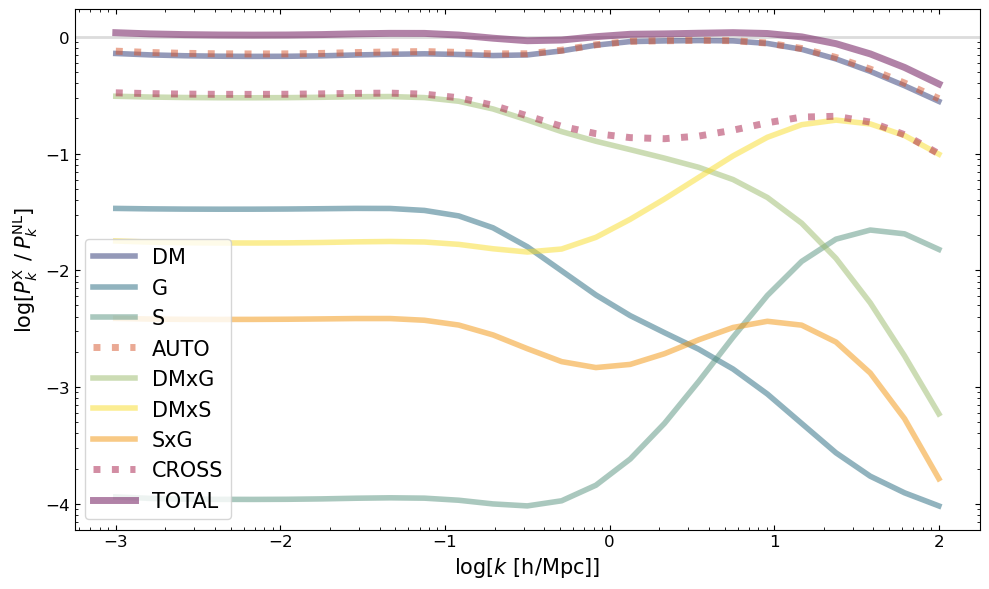

In [31]:
prefactors_dict = bhm.prefactor_dict()
# prefactors_dict.keys()

plt.figure(figsize=(10, 6))
# First we plot the reference line at y = 1 
# for comparison with the non-linear power spectrum
plt.axhline(1, c="gainsboro", lw=2) 

# Plot the individual terms
plt.loglog(bhm_pk_dict["k_array"], 
           prefactors_dict["dark_matter"]*bhm_pk_dict["dark_matter"]/pk_nonlin,
           c=pk_colors["dark_matter"], 
           label="DM",
           alpha=alpha,
           lw=4)
plt.loglog(bhm_pk_dict["k_array"],
           prefactors_dict["gas"]*bhm_pk_dict["gas"]/pk_nonlin,
              c=pk_colors["gas"],
              label="G",
              alpha=alpha,
              lw=4)

plt.loglog(bhm_pk_dict["k_array"],
               prefactors_dict["stars"]*bhm_pk_dict["stars"]/pk_nonlin,
                c=pk_colors["stars"],
                label="S",
                alpha=alpha,
                lw=4)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["auto"]/pk_nonlin,
           c=pk_colors["auto"],
           label="AUTO",
           alpha=alpha,
           lw=5,
           ls=":")
plt.loglog(bhm_pk_dict["k_array"], 
           prefactors_dict["dark_matter_gas"]*bhm_pk_dict["dark_matter_gas"]/pk_nonlin,
           c=pk_colors["dark_matter_gas"], 
           label="DMxG",
           alpha=alpha,
           lw=4)
plt.loglog(bhm_pk_dict["k_array"],
           prefactors_dict["dark_matter_stars"]*bhm_pk_dict["dark_matter_stars"]/pk_nonlin,
              c=pk_colors["dark_matter_stars"],
              label="DMxS",
              alpha=alpha,
              lw=4)
plt.loglog(bhm_pk_dict["k_array"],
               prefactors_dict["stars_gas"]*bhm_pk_dict["stars_gas"]/pk_nonlin,
                c=pk_colors["stars_gas"],
                label="SxG",
                alpha=alpha,
                lw=4)
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["cross"]/pk_nonlin,
           c=pk_colors["cross"],
           label="CROSS",
           alpha=alpha,
           lw=5,
           ls=":")
plt.loglog(bhm_pk_dict["k_array"], 
           bhm_pk_dict["total"]/pk_nonlin,
           c=pk_colors["total"],
           label="TOTAL",
           alpha=alpha,
           lw=5,)

plt.xlabel(r'log$[k\,\,[{\rm h/Mpc}]]$', fontsize=15)
plt.ylabel(r'log$[P_k^{\mathrm{X}} \: \// \: P_k^{\mathrm{NL}}]$', fontsize=15)

# Apply the log scale formatting function
set_log_scale_and_format(plt.gca())
plt.legend()

# Save the plot
plt.savefig("plots_output/bhm_total_pk_ratio.png", dpi=300)
plt.savefig("plots_output/bhm_total_pk_ratio.pdf", dpi=300)
